<a href="https://colab.research.google.com/github/ImAbhijeetPanda/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member**     - Abhijeet Panda

# **Project Summary -**



This project focuses on analyzing and clustering Netflix Movies and TV Shows data using unsupervised machine learning techniques. The dataset includes metadata about Netflix's catalog as of 2019, sourced from Flixable. It provides details such as the title, director, cast, genre, country of origin, release year, duration, and a brief description of each piece of content.

## Overview:
Netflix, as a global streaming service, offers a vast and diverse range of content. Over the years, Netflix's catalog has evolved significantly, with a marked increase in TV shows and changes in the types of movies available. This project aims to delve into this evolution and understand patterns in Netflix's content offerings.

### Key Focus Areas:
1. **Clustering Content:**
   - Unsupervised learning techniques such as K-Means, DBSCAN, or Hierarchical Clustering will be applied to group similar content.
   - Text-based features like genres and descriptions will be processed using Natural Language Processing (NLP) techniques such as TF-IDF or word embeddings to create meaningful clusters.

2. **Content Diversity Across Countries:**
   - Analyzing the availability of different types of content (Movies or TV Shows) across various countries.
   - Identifying region-specific trends and preferences.

3. **Shift in Netflix's Strategy:**
   - Analyzing release years and content types to understand whether Netflix has been focusing more on TV shows in recent years compared to movies.

4. **Exploratory Data Analysis (EDA):**
   - Visualizing trends in content addition over time.
   - Examining correlations between different features like release year, duration, and ratings.
   - Uncovering insights about the top genres, directors, and actors.

### Approach:
- **Data Cleaning and Preprocessing:**
  - Handle missing or inconsistent data in columns such as `director`, `cast`, and `country`.
  - Convert text-based columns like `listed_in` (genres) and `description` into numerical features for clustering using NLP techniques.

- **Feature Engineering:**
  - Create new features, such as the number of actors in a cast, the number of genres listed, or the duration in minutes for consistent analysis.

- **Visualization:**
  - Use libraries like Matplotlib and Seaborn for visual analysis of trends and patterns.
  - Plot clusters to understand the distribution of similar content.

- **Clustering:**
  - Apply clustering algorithms to group movies and TV shows based on their textual features.
  - Evaluate cluster quality using metrics like silhouette score or Davies-Bouldin Index.

- **Analysis of Findings:**
  - Interpret the results from clustering to draw conclusions about Netflix's catalog.
  - Understand user preferences and regional content trends.

### Outcomes:
This project aims to provide actionable insights into Netflix's catalog by clustering similar content and analyzing trends over time. The findings can help in understanding content strategies, regional preferences, and user engagement. These insights could be valuable for recommendations or strategic decisions for content creation and acquisition.

# **GitHub Link -**

https://github.com/ImAbhijeetPanda/Netflix-Movies-and-TV-Shows-Clustering.git

# **Problem Statement**


Netflix has a vast catalog of movies and TV shows, making it challenging to categorize and recommend similar content effectively. Additionally, understanding regional preferences and content trends over time is critical for strategic decision-making.




# **Business Objective**

1. Identify patterns and similarities in Netflix's catalog using clustering techniques for better content recommendations.  
2. Analyze content availability by country and Netflix's shifting focus from movies to TV shows in recent years.

# **Business Constraints**

1. Text-based features: Requires preprocessing for clustering, which can be computationally intensive.  
2. Resource limitation: Unsupervised learning and NLP techniques might demand significant processing power for large datasets.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [49]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [13]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [14]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [36]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [23]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [31]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [28]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


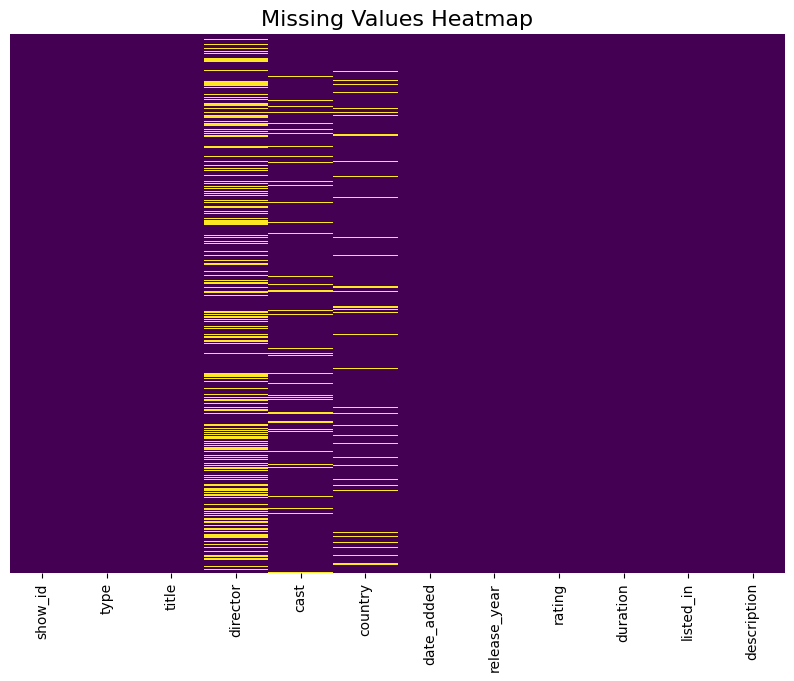

In [22]:
# Visualizing the missing values
# Set the figure size
plt.figure(figsize=(10,7))

# Create a heatmap to show missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add a title to the heatmap
plt.title("Missing Values Heatmap", fontsize=16)

# Show the plot
plt.show()

### What did you know about your dataset?

#### General Information:
- The dataset contains **7,787 rows** and **12 columns**.
- **No duplicate rows** are present (`df.duplicated().sum()` is 0).
- **Data Types:**
  - 11 columns are of type `object` (categorical or text data).
  - 1 column (`release_year`) is of type `int64`.

## Missing Values:
- Columns with missing values:
  1. **director**: 2,389 missing values.
  2. **cast**: 718 missing values.
  3. **country**: 507 missing values.
  4. **date_added**: 10 missing values.
  5. **rating**: 7 missing values.
- Columns such as `show_id`, `type`, `title`, `release_year`, `duration`, `listed_in`, and `description` do not contain missing values.

## Observations:
1. The **`director`, `cast`, `country`, `date_added`, and `rating`** columns have missing values that require handling during preprocessing.
2. The dataset includes both categorical and text-heavy features (`type`, `title`, `description`, `listed_in`), which are suitable for clustering.
3. The **`release_year`** column is numeric and can be used for time-based trend analysis.
4. The **`duration`** column, while non-null, may need preprocessing to separate minutes or seasons into a numeric format for analysis.

## ***2. Understanding Your Variables***

In [40]:
# Dataset Columns
df_col_list = df.columns.to_list()
df_col_list

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [42]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description



1. **show_id**: A unique identifier for every movie or TV show.
2. **type**: The type of content - either "Movie" or "TV Show".
3. **title**: The title of the movie or TV show.
4. **director**: The director(s) of the show/movie.
5. **cast**: The actors involved in the movie or TV show.
6. **country**: The country of production.
7. **date_added**: The date when the content was added to Netflix.
8. **release_year**: The year when the movie or TV show was originally released.
9. **rating**: The TV rating assigned to the show/movie. Some common ratings include:
   - **V**: Viewer discretion advised (may indicate content not suitable for children or sensitive viewers).
   - **G**: General audience, suitable for all ages.
   - **NC-17**: No one 17 and under admitted, typically for explicit content.
   - **NR**: Not rated, meaning it hasn't received a formal rating.
   - **PG**: Parental Guidance suggested, some material may not be suitable for children.
   - **PG-13**: Parents strongly cautioned, content may be inappropriate for children under 13.
   - **R**: Restricted, under 17 requires accompanying parent or adult guardian.
   - **TV-14**: Suitable for viewers aged 14 and older.
   - **TV-G**: General audience, suitable for all ages.
   - **TV-MA**: Mature audience, for adults 17 and older, content may include explicit language or violence.
   - **TV-PG**: Parental guidance suggested, may include content unsuitable for younger children.
   - **TV-Y**: Suitable for all children, including very young children.
   - **TV-Y7**: Suitable for children aged 7 and older.
   - **TV-Y7-FV**: Suitable for children aged 7 and older with fantasy violence.
   - **UR**: Unrated, often used for content that has not been rated by an official body.

10. **duration**: The total duration of the movie (in minutes) or the number of seasons for a TV show.
11. **listed_in**: The genre or category of the show (e.g., Comedy, Drama, etc.).
12. **description**: A brief summary of the movie or TV show.


### Check Unique Values for each variable.

In [48]:
# Check Unique Values for each variable.
#Unique values in each column and display the unique values if count < 20

# Loop through each column in the DataFrame
for column in df.columns:
    # Get the number of unique values in the column
    unique_values = df[column].nunique()

    # Print the number of unique values
    print(f"Column: {column} | Number of unique values: {unique_values}")

    # If the number of unique values is less than 20, display the unique values
    if unique_values < 40:
        print(f"Unique values in {column}:")
        print(df[column].unique())
    print("--"*40)  # To separate output for each column

Column: show_id | Number of unique values: 7787
--------------------------------------------------------------------------------
Column: type | Number of unique values: 2
Unique values in type:
['TV Show' 'Movie']
--------------------------------------------------------------------------------
Column: title | Number of unique values: 7787
--------------------------------------------------------------------------------
Column: director | Number of unique values: 4049
--------------------------------------------------------------------------------
Column: cast | Number of unique values: 6831
--------------------------------------------------------------------------------
Column: country | Number of unique values: 681
--------------------------------------------------------------------------------
Column: date_added | Number of unique values: 1565
--------------------------------------------------------------------------------
Column: release_year | Number of unique values: 73
-----------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***